<a href="https://colab.research.google.com/github/hoangthanh1234/Final_Project_Pattern_recognization/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install numpy
!pip install tensorflow==2.8.0rc0
!pip install matplotlib==3.1.0
!pip install pillow==6.2.1

In [2]:
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import load_model
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab/rps.h5"
model = load_model(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /content/drive/MyDrive/Colab/rps-test-set.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /content/drive/MyDrive/Colab/rps.zip



--2023-12-05 07:07:51--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.207, 173.194.212.207, 142.251.162.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/content/drive/MyDrive/Colab/rps-test-set.zip’

/content/drive/MyDr 100%[===================>]  28.15M  49.7MB/s    in 0.6s    

2023-12-05 07:07:52 (49.7 MB/s) - ‘/content/drive/MyDrive/Colab/rps-test-set.zip’ saved [29516758/29516758]

--2023-12-05 07:07:52--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.207, 173.194.212.207, 142.251.162.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20068222

In [ ]:
# extract data file

import os
import zipfile

local_zip = '/content/drive/MyDrive/Colab/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab/')
zip_ref.close()

local_zip = '/content/drive/MyDrive/Colab/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/content/drive/MyDrive/Colab/rps/rock')
paper_dir = os.path.join('/content/drive/MyDrive/Colab/rps/paper')
scissors_dir = os.path.join('/content/drive/MyDrive/Colab/rps/scissors')
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


['/content/drive/MyDrive/Colab/rps/paper/paper01-000.png,1,paper', '/content/drive/MyDrive/Colab/rps/paper/paper01-001.png,1,paper', '/content/drive/MyDrive/Colab/rps/paper/paper01-002.png,1,paper', '/content/drive/MyDrive/Colab/rps/rock/rock01-000.png,2,rock', '/content/drive/MyDrive/Colab/rps/rock/rock01-001.png,2,rock', '/content/drive/MyDrive/Colab/rps/rock/rock01-002.png,2,rock', '/content/drive/MyDrive/Colab/rps/scissors/scissors01-000.png,3,scissor', '/content/drive/MyDrive/Colab/rps/scissors/scissors01-001.png,3,scissor', '/content/drive/MyDrive/Colab/rps/scissors/scissors01-002.png,3,scissor']


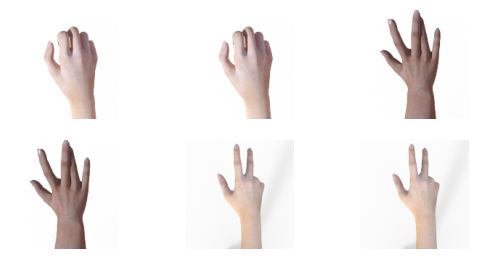

In [53]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img_load = image.load_img(img_path, target_size=(150, 150))
    ax = plt.subplot(3,3,1+i)
    ax.imshow(img_load,cmap='binary')
    plt.axis('Off')
plt.show()

In [7]:
TRAINING_DIR = "/content/drive/MyDrive/Colab/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Colab/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [27]:
#Train model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)
model.save("/content/drive/MyDrive/Colab/rps.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

<ipython-input-27-4f1e91da68b0>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)


Epoch 1/10
79/79 [==============================] - 268s 3s/step - loss: 1.1077 - accuracy: 0.3627 - val_loss: 0.7884 - val_accuracy: 0.6317
Epoch 2/10
79/79 [==============================] - 264s 3s/step - loss: 0.8735 - accuracy: 0.5909 - val_loss: 0.3983 - val_accuracy: 0.8011
Epoch 3/10
79/79 [==============================] - 267s 3s/step - loss: 0.6145 - accuracy: 0.7282 - val_loss: 0.0962 - val_accuracy: 0.9731
Epoch 4/10
79/79 [==============================] - 264s 3s/step - loss: 0.4556 - accuracy: 0.8167 - val_loss: 0.1974 - val_accuracy: 0.9113
Epoch 5/10
79/79 [==============================] - 264s 3s/step - loss: 0.3142 - accuracy: 0.8821 - val_loss: 0.1111 - val_accuracy: 0.9409
Epoch 6/10
79/79 [==============================] - 266s 3s/step - loss: 0.2327 - accuracy: 0.9075 - val_loss: 0.1124 - val_accuracy: 0.9704
Epoch 7/10
79/79 [==============================] - 262s 3s/step - loss: 0.1969 - accuracy: 0.9298 - val_loss: 0.0916 - val_accuracy: 0.9462
Epoch 8/10
79

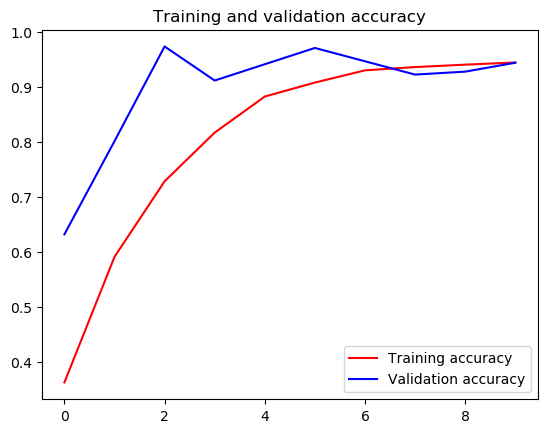

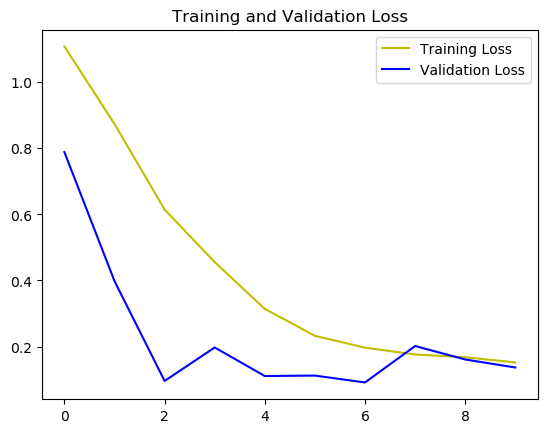

<Figure size 640x480 with 0 Axes>

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [45]:
#note paper = 1 ([1 0 0]), rock = 2 [0 1 0], scissors = 3 [0 0 1]
def pre_d(class_s):
  class_p = 0
  if int(class_s[0]) > 0:
    class_p = 1
  if int(class_s[1]) > 0:
    class_p = 2
  if int(class_s[2]) > 0:
    class_p = 3
  return class_p

def show_images_labels_predicttions(test_data):
  plt.gcf().set_size_inches(12,14)
  for i in range(0,len(test_data)):
    img = test_data[i].split(",")
    img_load = image.load_img(img[0], target_size=(150, 150))
    ax = plt.subplot(5,5,1+i)
    ax.imshow(img_load,cmap='binary')
    x = image.img_to_array(img_load)
    x = np.expand_dims(x, axis=0)
    image_pre = images = np.vstack([x])
    result =model.predict(image_pre, batch_size=10)
    pre_label = pre_d(result[0].astype(int))
    title = 'ai ='
    title += ('(o)' if pre_label == int(img[1]) else '(x)')
    title += '\nlabel = ' + str(img[2])
    ax.set_title(title)
    ax.set_xticks([]);ax.set_yticks([])
  plt.show()


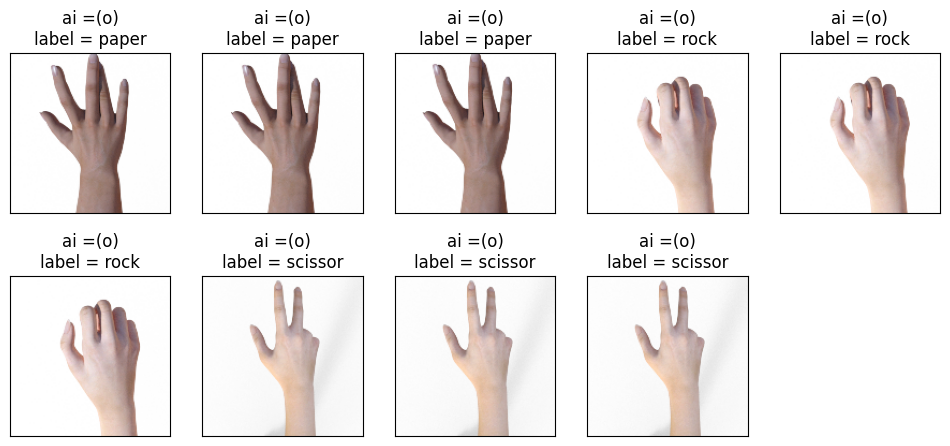

In [48]:
#create test data by format "link_to_image,class_id,class_name"
test_data = []
for paper in paper_files[:3]:
  test_data.append(paper_dir+'/'+paper+',1,paper')
for rock in rock_files[:3]:
  test_data.append(rock_dir+'/'+rock+',2,rock')
for scissor in scissors_files[:3]:
  test_data.append(scissors_dir+'/'+scissor+',3,scissor')

# predict and show the result
show_images_labels_predicttions(test_data)